In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random




# Importing required data

In [10]:
train_data = pd.read_csv('Train.csv')                       #importing train dataset 
train_data.shape

(5410, 2)

In [11]:
train_Benif = pd.read_csv("Train_Beneficiarydata.csv" ) 
train_Inpat = pd.read_csv("Train_Inpatientdata.csv" ) 
train_Outpat = pd.read_csv("Train_Outpatientdata.csv" ) 

In [12]:
train_Benif.shape

(138556, 25)

In [13]:
train_Inpat.shape

(40474, 30)

In [14]:
train_Outpat.shape

(517737, 27)

In [15]:
train_data.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [16]:
train_Benif.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,01-01-1943,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,01-09-1936,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,01-08-1936,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,01-07-1922,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,01-09-1935,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [17]:
train_Inpat.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [18]:
train_Outpat.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [19]:
train_Benif.nunique()

BeneID                             138556
DOB                                   900
DOD                                    11
Gender                                  2
Race                                    4
RenalDiseaseIndicator                   2
State                                  52
County                                314
NoOfMonths_PartACov                    13
NoOfMonths_PartBCov                    13
ChronicCond_Alzheimer                   2
ChronicCond_Heartfailure                2
ChronicCond_KidneyDisease               2
ChronicCond_Cancer                      2
ChronicCond_ObstrPulmonary              2
ChronicCond_Depression                  2
ChronicCond_Diabetes                    2
ChronicCond_IschemicHeart               2
ChronicCond_Osteoporasis                2
ChronicCond_rheumatoidarthritis         2
ChronicCond_stroke                      2
IPAnnualReimbursementAmt             3004
IPAnnualDeductibleAmt                 147
OPAnnualReimbursementAmt          

In [20]:
train_Inpat.nunique()

BeneID                    31289
ClaimID                   40474
ClaimStartDt                398
ClaimEndDt                  365
Provider                   2092
InscClaimAmtReimbursed      146
AttendingPhysician        11604
OperatingPhysician         8287
OtherPhysician             2877
AdmissionDt                 398
ClmAdmitDiagnosisCode      1928
DeductibleAmtPaid             1
DischargeDt                 365
DiagnosisGroupCode          736
ClmDiagnosisCode_1         2254
ClmDiagnosisCode_2         2439
ClmDiagnosisCode_3         2427
ClmDiagnosisCode_4         2441
ClmDiagnosisCode_5         2374
ClmDiagnosisCode_6         2358
ClmDiagnosisCode_7         2310
ClmDiagnosisCode_8         2243
ClmDiagnosisCode_9         2094
ClmDiagnosisCode_10         952
ClmProcedureCode_1         1117
ClmProcedureCode_2          297
ClmProcedureCode_3          154
ClmProcedureCode_4           48
ClmProcedureCode_5            6
ClmProcedureCode_6            0
dtype: int64

In [21]:
train_Outpat.nunique()

BeneID                    133980
ClaimID                   517737
ClaimStartDt                 385
ClaimEndDt                   366
Provider                    5012
InscClaimAmtReimbursed       342
AttendingPhysician         74109
OperatingPhysician         28532
OtherPhysician             44388
ClmDiagnosisCode_1         10354
ClmDiagnosisCode_2          5056
ClmDiagnosisCode_3          4448
ClmDiagnosisCode_4          3925
ClmDiagnosisCode_5          3412
ClmDiagnosisCode_6          2968
ClmDiagnosisCode_7          2635
ClmDiagnosisCode_8          2260
ClmDiagnosisCode_9          1894
ClmDiagnosisCode_10          495
ClmProcedureCode_1            80
ClmProcedureCode_2            22
ClmProcedureCode_3             4
ClmProcedureCode_4             2
ClmProcedureCode_5             0
ClmProcedureCode_6             0
DeductibleAmtPaid             16
ClmAdmitDiagnosisCode       3715
dtype: int64

# Merging files

In [52]:
merge_file = pd.merge(train_data,train_Inpat, on=["Provider"], how="left")

In [23]:
merged_file = pd.merge(merge_file,train_Outpat, on=["Provider"], how="left")

In [24]:
merged_file.shape

(11308851, 57)

In [25]:
merged_file.nunique()

Provider                      5410
PotentialFraud                   2
BeneID_x                     31289
ClaimID_x                    40474
ClaimStartDt_x                 398
ClaimEndDt_x                   365
InscClaimAmtReimbursed_x       146
AttendingPhysician_x         11604
OperatingPhysician_x          8287
OtherPhysician_x              2877
AdmissionDt                    398
ClmAdmitDiagnosisCode_x       1928
DeductibleAmtPaid_x              1
DischargeDt                    365
DiagnosisGroupCode             736
ClmDiagnosisCode_1_x          2254
ClmDiagnosisCode_2_x          2439
ClmDiagnosisCode_3_x          2427
ClmDiagnosisCode_4_x          2441
ClmDiagnosisCode_5_x          2374
ClmDiagnosisCode_6_x          2358
ClmDiagnosisCode_7_x          2310
ClmDiagnosisCode_8_x          2243
ClmDiagnosisCode_9_x          2094
ClmDiagnosisCode_10_x          952
ClmProcedureCode_1_x          1117
ClmProcedureCode_2_x           297
ClmProcedureCode_3_x           154
ClmProcedureCode_4_x

In [26]:
merged_file.head()

,Provider,PotentialFraud,BeneID_x,ClaimID_x,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ClmDiagnosisCode_9_y,ClmDiagnosisCode_10_y,ClmProcedureCode_1_y,ClmProcedureCode_2_y,ClmProcedureCode_3_y,ClmProcedureCode_4_y,ClmProcedureCode_5_y,ClmProcedureCode_6_y,DeductibleAmtPaid_y,ClmAdmitDiagnosisCode_y
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000.0,PHY340163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000.0,PHY340163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000.0,PHY340163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970
3,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000.0,PHY340163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902
4,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000.0,PHY340163,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78900


In [50]:
merged_file.rename(columns = {'BeneID_x':'BeneID'}, inplace = True) #  changing the column name as it's only common column to merge train_Benif 

In [49]:
merged_df =pd.merge(merged_file,train_Benif, on=["BeneID"],how="left")

In [48]:
merged_df.shape

(11308851, 81)

In [30]:
merged_df=merged_df.drop_duplicates(subset=['Provider'])  #dropping Duplicate providers

In [31]:
merged_df.shape

(5410, 81)

In [32]:
merged_df.head()

,Provider,PotentialFraud,BeneID,ClaimID_x,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000.0,PHY340163,NaN,NaN,...,1.0,1.0,1.0,2.0,2.0,1.0,36000.0,1068.0,3520.0,140.0
100,PRV51003,Yes,BENE18650,CLM50983,2009-05-13,2009-05-19,14000.0,PHY364445,PHY364445,NaN,...,2.0,1.0,1.0,2.0,2.0,2.0,14000.0,1068.0,2630.0,1120.0
4440,PRV51004,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4589,PRV51005,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5754,PRV51007,No,BENE16277,CLM53111,2009-05-28,2009-06-01,6000.0,PHY360635,PHY378129,NaN,...,2.0,1.0,1.0,2.0,2.0,1.0,6120.0,1068.0,200.0,50.0


In [33]:
merged_df.isnull().sum() 

Provider                       0
PotentialFraud                 0
BeneID                      3318
ClaimID_x                   3318
ClaimStartDt_x              3318
                            ... 
ChronicCond_stroke          3318
IPAnnualReimbursementAmt    3318
IPAnnualDeductibleAmt       3318
OPAnnualReimbursementAmt    3318
OPAnnualDeductibleAmt       3318
Length: 81, dtype: int64

# missing value treatement

In [34]:
merged_df.dtypes

Provider                     object
PotentialFraud               object
BeneID                       object
ClaimID_x                    object
ClaimStartDt_x               object
                             ...   
ChronicCond_stroke          float64
IPAnnualReimbursementAmt    float64
IPAnnualDeductibleAmt       float64
OPAnnualReimbursementAmt    float64
OPAnnualDeductibleAmt       float64
Length: 81, dtype: object

<AxesSubplot:>

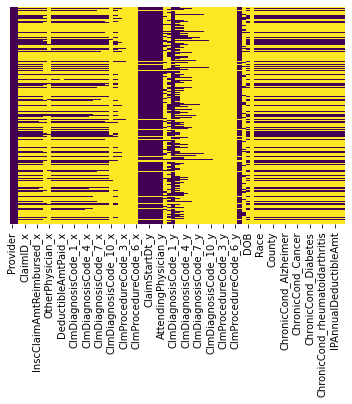

In [35]:
sns.heatmap(merged_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
merged_df['OtherPhysician_x'].isnull().sum()

5118

In [37]:
merged_df.drop('OtherPhysician_x', axis=1, inplace=True)

In [38]:
merged_df['OperatingPhysician_y'].isnull().sum()

4538

In [39]:
merged_df.drop('OperatingPhysician_y',axis=1, inplace=True)

In [40]:
merged_df.drop(['ClmDiagnosisCode_1_x','ClmDiagnosisCode_2_x','ClmDiagnosisCode_3_x','ClmDiagnosisCode_4_x','ClmDiagnosisCode_5_x','ClmDiagnosisCode_6_x','ClmDiagnosisCode_7_x','ClmDiagnosisCode_8_x','ClmDiagnosisCode_9_x','ClmDiagnosisCode_10_x','ClmProcedureCode_1_x','ClmProcedureCode_2_x','ClmProcedureCode_3_x','ClmProcedureCode_4_x','ClmProcedureCode_5_x','ClmProcedureCode_6_x'],axis=1, inplace=True)

In [41]:
merged_df.drop(['ClmDiagnosisCode_1_y','ClmDiagnosisCode_2_y','ClmDiagnosisCode_3_y','ClmDiagnosisCode_4_y','ClmDiagnosisCode_5_y','ClmDiagnosisCode_6_y','ClmDiagnosisCode_7_y','ClmDiagnosisCode_8_y','ClmDiagnosisCode_9_y','ClmDiagnosisCode_10_y','ClmProcedureCode_1_y','ClmProcedureCode_2_y','ClmProcedureCode_3_y','ClmProcedureCode_4_y','ClmProcedureCode_5_y','ClmProcedureCode_6_y','DeductibleAmtPaid_y','ClmAdmitDiagnosisCode_y'],axis=1,inplace=True)

In [42]:
merged_df.head()

,Provider,PotentialFraud,BeneID,ClaimID_x,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000.0,PHY340163,NaN,2009-07-04,...,1.0,1.0,1.0,2.0,2.0,1.0,36000.0,1068.0,3520.0,140.0
100,PRV51003,Yes,BENE18650,CLM50983,2009-05-13,2009-05-19,14000.0,PHY364445,PHY364445,2009-05-13,...,2.0,1.0,1.0,2.0,2.0,2.0,14000.0,1068.0,2630.0,1120.0
4440,PRV51004,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4589,PRV51005,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5754,PRV51007,No,BENE16277,CLM53111,2009-05-28,2009-06-01,6000.0,PHY360635,PHY378129,2009-05-28,...,2.0,1.0,1.0,2.0,2.0,1.0,6120.0,1068.0,200.0,50.0


In [43]:
merged_df.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID_x', 'ClaimStartDt_x',
       'ClaimEndDt_x', 'InscClaimAmtReimbursed_x', 'AttendingPhysician_x',
       'OperatingPhysician_x', 'AdmissionDt', 'ClmAdmitDiagnosisCode_x',
       'DeductibleAmtPaid_x', 'DischargeDt', 'DiagnosisGroupCode', 'BeneID_y',
       'ClaimID_y', 'ClaimStartDt_y', 'ClaimEndDt_y',
       'InscClaimAmtReimbursed_y', 'AttendingPhysician_y', 'OtherPhysician_y',
       'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt'

<AxesSubplot:>

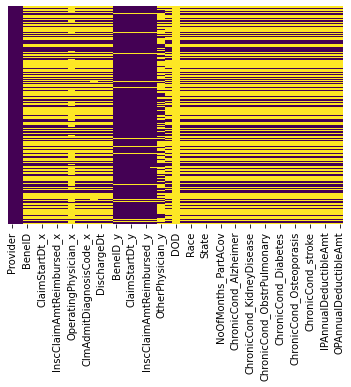

In [44]:
sns.heatmap(merged_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')